In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import *

In [2]:
import tensorflow

In [3]:
train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv("fashion-mnist_test.csv")

In [23]:
x_test=test.values[:,1:]/255.0
y_test=test.values[:,0]

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train=train.values[:,1:]/255.0
y_train=train.values[:,0]

In [6]:
import matplotlib.pyplot as plt

In [7]:
def draw_img(img):
    img=img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    print(img.shape)
    plt.axis("off")
    plt.show()
    
    

(28, 28)


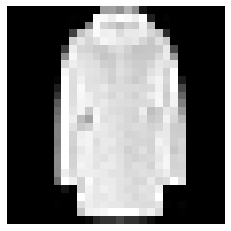

In [8]:
draw_img(x_train[6])

In [9]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [10]:
from keras.utils.np_utils import to_categorical

In [11]:
y_train=to_categorical(y_train)

In [24]:
y_test=to_categorical(y_test)

In [12]:
y_train.shape

(60000, 10)

In [13]:
x_train=x_train.reshape((-1,28,28,1))

In [25]:
x_test=x_test.reshape((-1,28,28,1))

In [14]:
x_train.shape

(60000, 28, 28, 1)

#CNN MODEL

In [15]:
model=Sequential()

In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(8,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten (Flatten)            (None, 128)              

In [17]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [18]:
hist = model.fit(x_train,y_train,epochs=10,validation_split=0.1,batch_size=128)

Epoch 1/10
422/422 [==============================] - 99s 233ms/step - loss: 0.6917 - accuracy: 0.7462 - val_loss: 0.4827 - val_accuracy: 0.8328
Epoch 2/10
422/422 [==============================] - 97s 231ms/step - loss: 0.3925 - accuracy: 0.8616 - val_loss: 0.3810 - val_accuracy: 0.8738
Epoch 3/10
422/422 [==============================] - 100s 238ms/step - loss: 0.3384 - accuracy: 0.8796 - val_loss: 0.3560 - val_accuracy: 0.8737
Epoch 4/10
422/422 [==============================] - 111s 263ms/step - loss: 0.3083 - accuracy: 0.8906 - val_loss: 0.3320 - val_accuracy: 0.8832
Epoch 5/10
422/422 [==============================] - 115s 272ms/step - loss: 0.2860 - accuracy: 0.8981 - val_loss: 0.3026 - val_accuracy: 0.9007
Epoch 6/10
422/422 [==============================] - 114s 269ms/step - loss: 0.2694 - accuracy: 0.9035 - val_loss: 0.2968 - val_accuracy: 0.8962
Epoch 7/10
422/422 [==============================] - 115s 272ms/step - loss: 0.2563 - accuracy: 0.9080 - val_loss: 0.2949 - v

#TRAINING ACCURACY

In [21]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 21s 11ms/step - loss: 0.2134 - accuracy: 0.9259


[0.2133806049823761, 0.9259499907493591]

#TESTING ACCURACY

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2473 - accuracy: 0.9144


[0.24727174639701843, 0.9143999814987183]